# L03-3-Importing From Internet
## Assignment Instructions
Rename with your name in place of Studentname and make your edits and updates here.


# Importing From Internet
Now that we know how to import flat files locally, what about directly from the Internet? Although manually downloading a file to your local computer is not difficult, there are times when importing directly from the Internet would be helpful. To illustrate this, let me introduce the UCI machine learning repository. University of California Irvine hosts a machine learning repository containing many real-world data sets. As luck would have it, they have a fuel economy automotive dataset. 

The same tidyverse import function read_csv() can be used to import from a URL. We just replace the local filename with a URL string.

In this exercise, we will import this UCI data and then do a bit of visual data analysis on it. I hope you haven’t forgotten your ggplot skills. This data is a bit messier, which makes for a great learning opportunity. First, the header data is stored separately. I created an Excel spreadsheet with this info, so we will have to import this and combine the headers from the spreadsheet to the UCI automotive data. 

After we have a data frame containing the data, we will analyze highway miles per gallon vs engine displacement. This is an opportunity to reinforce your filtering, piping, and plotting skills. See if you can do it without any hints by looking at the prior exercises and applying it to this new data set. If you need hints, they are also provided later in this notebook and of course the solution notebook is available.



## R Features
* library()
* read_csv()
* read_excel()
* glimpse()
* write_csv()
* print()
* c()
* ggplot()
* geom_point()
* geom_jitter()
* geom_smooth()
* filter()
* facet_grid()

## Datasets
* automotive from UCI


In [2]:
# Load libraries
library('readxl') # readxl
library('tidyverse') # tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.2.5
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## UCI Automobile Data Set

Manually explore UCI and a description of the data in your web browser. 

https://archive.ics.uci.edu/ml/datasets/Automobile

Did you notice where the column names were stored? 

In [3]:
# Let's start by assuming you have the 
# URL for the file you want to import
# Store this text string in a variable named auto_url
auto_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

The column names are not in the first row of the data file, but rather in a second description file. I didn't want to force you to type all those columns names. I'm sure you have enough busy work like this already. I manually copied the data into Excel and with some manual work and Excel formulas I got the list of column names in an Excel sheet. 

Also, I changed the hyphen dashes in the columns names to underscores. This isn't just to be consistent with my snake_case naming convention, but also some R functions including ggplot interpret the dash as a subtraction operator. So, I avoid having to wrestle with R and just use underscores instead of dashes for column names.

In [4]:
?read_excel

In [5]:
# Import the column names
# from Excel file: auto_column_names.xlsx
# into df_auto_cols data frame
df_auto_cols <- read_excel("auto_column_names.xlsx", col_names = FALSE)

# Glimpse the results
# there should be 26 rows
# and one column
df_auto_cols %>% glimpse()

# Notice the name of the column

Observations: 26
Variables: 1
$ X__1 <chr> "symboling", "normalized_losses", "make", "fuel_type", "aspirati…


We will now use the url + column names to import the data from UCI. Notice however that we have columns names stored in a data frame. That doesn't exactly the specification read_csv() is expecting if we want to provide the list of columns names. It is expecting a vector, really a single column in a data frame, not the whole data frame.

Confusingly, our df_auto_cols data frame only has one column, but it is still of class data frame, nonetheless. So we need to reference the specific column in the data frame and that is what we pass as a parameter for col_names in read_csv.

There are many ways to reference columns in a data frame. A common method is to use the '\$' followed by the column name. In this case df_auto_cols$X__1

In [6]:
# Import the UCI auto data using 
# auto_url for the url string
# and df_auto_cols$X0 for the col_names
# Store the result in df
df <- read_csv(auto_url, col_names = df_auto_cols$X__1)

# Glimpse the result
# There should be 205 rows
# and 26 columns with appropriate column names
df %>% glimpse()

Parsed with column specification:
cols(
  .default = col_character(),
  symboling = col_integer(),
  wheel_base = col_double(),
  length = col_double(),
  width = col_double(),
  height = col_double(),
  curb_weight = col_integer(),
  engine_size = col_integer(),
  compression_ratio = col_double(),
  city_mpg = col_integer(),
  highway_mpg = col_integer()
)
See spec(...) for full column specifications.


Observations: 205
Variables: 26
$ symboling         <int> 3, 3, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, …
$ normalized_losses <chr> "?", "?", "?", "164", "164", "?", "158", "?", "158"…
$ make              <chr> "alfa-romero", "alfa-romero", "alfa-romero", "audi"…
$ fuel_type         <chr> "gas", "gas", "gas", "gas", "gas", "gas", "gas", "g…
$ aspiration        <chr> "std", "std", "std", "std", "std", "std", "std", "s…
$ num_of_doors      <chr> "two", "two", "two", "four", "four", "two", "four",…
$ body_style        <chr> "convertible", "convertible", "hatchback", "sedan",…
$ drive_wheels      <chr> "rwd", "rwd", "rwd", "fwd", "4wd", "fwd", "fwd", "f…
$ engine_location   <chr> "front", "front", "front", "front", "front", "front…
$ wheel_base        <dbl> 88.6, 88.6, 94.5, 99.8, 99.4, 99.8, 105.8, 105.8, 1…
$ length            <dbl> 168.8, 168.8, 171.2, 176.6, 176.6, 177.3, 192.7, 19…
$ width             <dbl> 64.1, 64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 71.4, 71.…
$ height            

In [7]:
# Write a snapshot of the source data
# to auto.csv
write_csv(df, "auto.csv")

In [8]:
# If we wanted to specify the column 
# names directly in R, we can build up a 
# vector using the c() combine function
col_names_r <- c(
"symboling",
"normalized_losses",
"make",
"fuel_type",
"aspiration",
"num_of_doors",
"body_style",
"drive_wheels",
"engine_location",
"wheel_base",
"length",
"width",
"height",
"curb_weight",
"engine_type",
"num_of_cylinders",
"engine_size",
"fuel_system",
"bore",
"stroke",
"compression_ratio",
"horsepower",
"peak_rpm",
"city_mpg",
"highway_mpg",
"price"
)

# We can print the values of a vector using the 
# print command, or just having the variable on a line with nothing else
# I like to be explicit and use print()
print(col_names_r)


 [1] "symboling"         "normalized_losses" "make"             
 [4] "fuel_type"         "aspiration"        "num_of_doors"     
 [7] "body_style"        "drive_wheels"      "engine_location"  
[10] "wheel_base"        "length"            "width"            
[13] "height"            "curb_weight"       "engine_type"      
[16] "num_of_cylinders"  "engine_size"       "fuel_system"      
[19] "bore"              "stroke"            "compression_ratio"
[22] "horsepower"        "peak_rpm"          "city_mpg"         
[25] "highway_mpg"       "price"            


Notice above how it prints vector values. It moves left to right from top to bottom. The index numbers are the vector index position of the value just to the right of it. So index 25 is highway-mpg. Index 26 is price.

Although there is a bit of clean up work that should be done at some point around this data such as changing character strings to numbers, and handling missing values, I always want to visualize the data as soon as I can. There's always time later for data wrangling.

Our goal is to see the highway miles per hour trend (y axis) compared to engine size (x axis). The trend should be based on the number of doors, two or four, the number of cylinders, 4, 6, or 8, and the number of drive wheels, 2 or 4. 

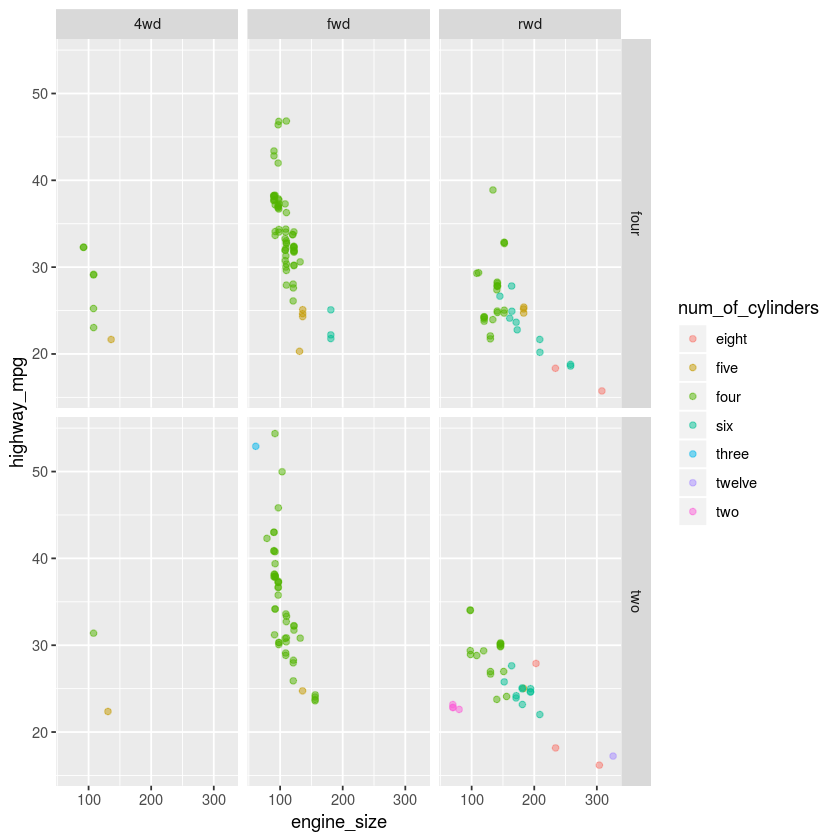

In [9]:
# Create the plot as described above
# This is very challenging to do from scratch
# At least start it and get at least a scatter plot
# and if you need more guidance, look at the below cells
# for hints

# dataframe: df
# plot type: scatter plot with jitter and alpha and linear trend lines
# y axis: highway mpg
# x axis: engine size
# color by cylinder
# facet by number of doors and drive wheels
# filter out any categories that are outliers
df%>%filter(num_of_doors !='?')%>%
    ggplot(aes(x = engine_size, y = highway_mpg, color = num_of_cylinders))+
    geom_jitter(alpha = 0.5, width = 0.2)+
    facet_grid(num_of_doors ~ drive_wheels)

Don't just skip over the above cell, give it a try. Look back a prior notebooks. I am sure you can at least get a start with a scatter plot. Build your way up one step at a time. I don't do this all at once. 

Below is a guided version of the above if you need more hints. There is also the solution file and the help ? if you need them. That is what they are there for. 

In [10]:
# I start with reminding myself 
# the columns of the data
df_auto_cols

X__1
<chr>
symboling
normalized_losses
make
fuel_type
aspiration
num_of_doors
body_style
drive_wheels
engine_location


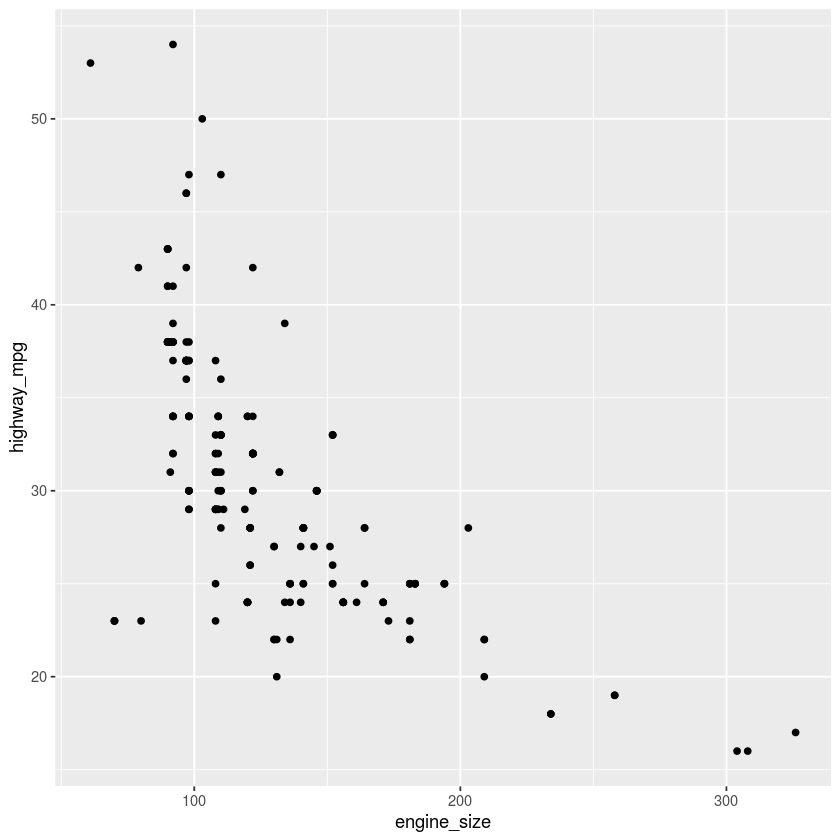

In [11]:
# Then I get the initial plot working
df %>% 
  ggplot(aes(x = engine_size, y = highway_mpg)) + 
   geom_point()

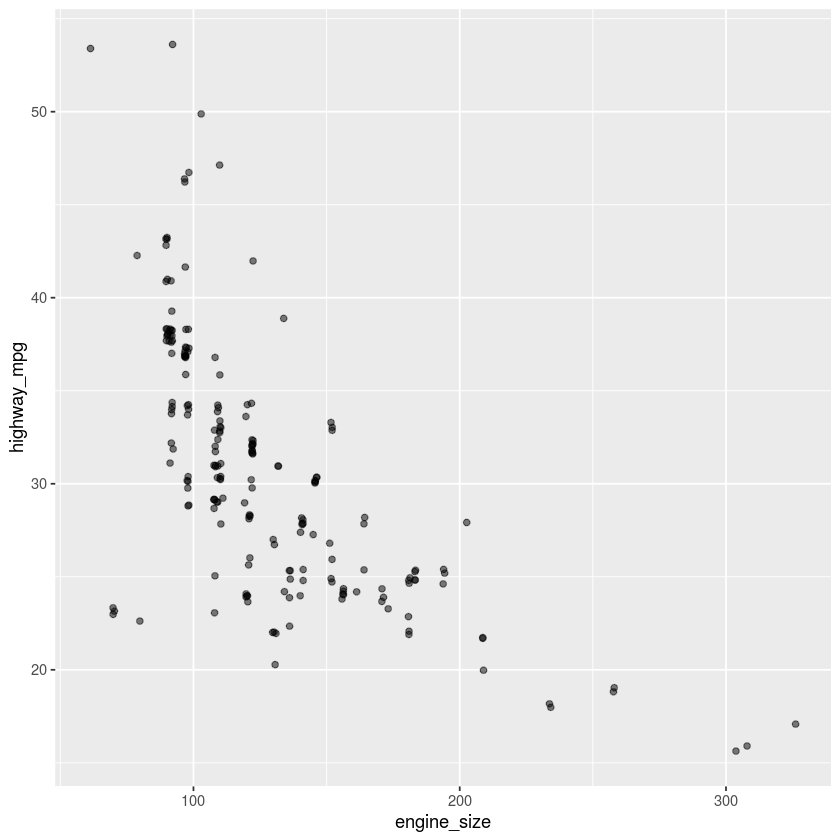

In [12]:
# I'll add jitter and alpha blend as a good practice
df %>% 
   ggplot(aes(x = engine_size, y = highway_mpg)) + 
   geom_jitter(alpha = 0.5)

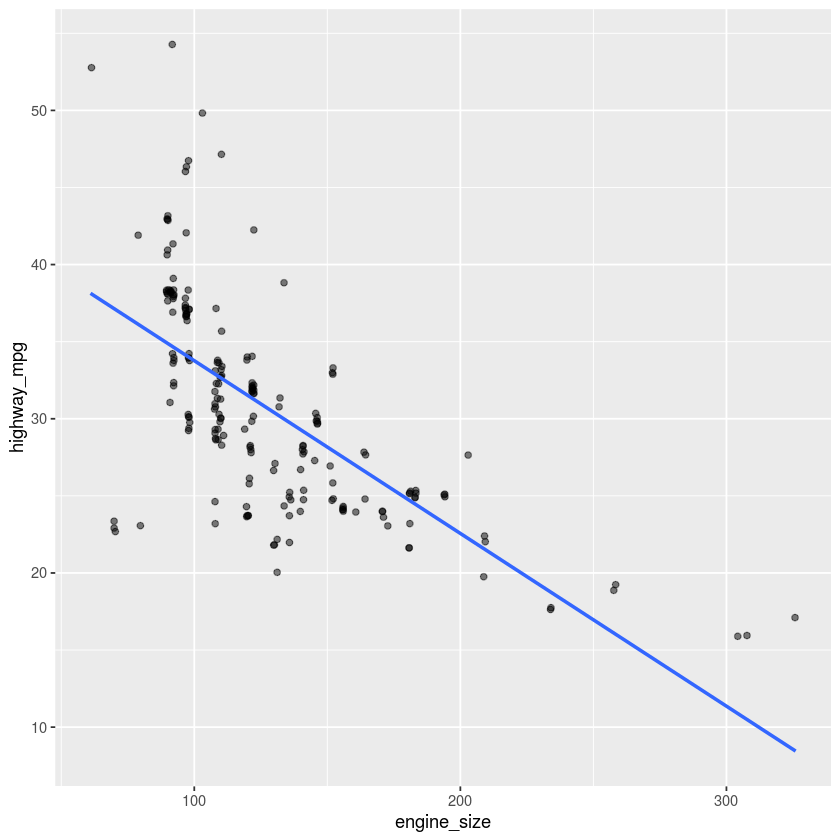

In [13]:
# Next add the trend line
df %>% 
  ggplot(aes(x = engine_size, y = highway_mpg)) + 
   geom_jitter(alpha = 0.5) + 
   geom_smooth(se = FALSE, method = "lm")

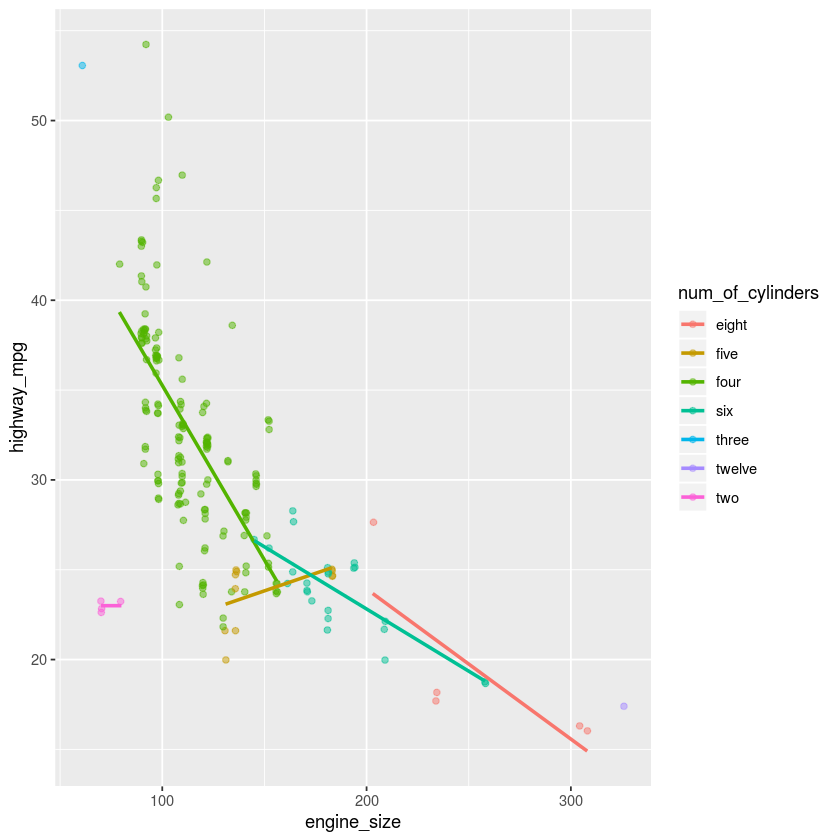

In [14]:
# Then add more dimensions 
# such as color for number of cylinders
df %>% 
  ggplot(aes(x = engine_size, y = highway_mpg, color = num_of_cylinders)) + 
   geom_jitter(alpha = 0.5) + 
   geom_smooth(se = FALSE, method = "lm")

In [15]:
?filter

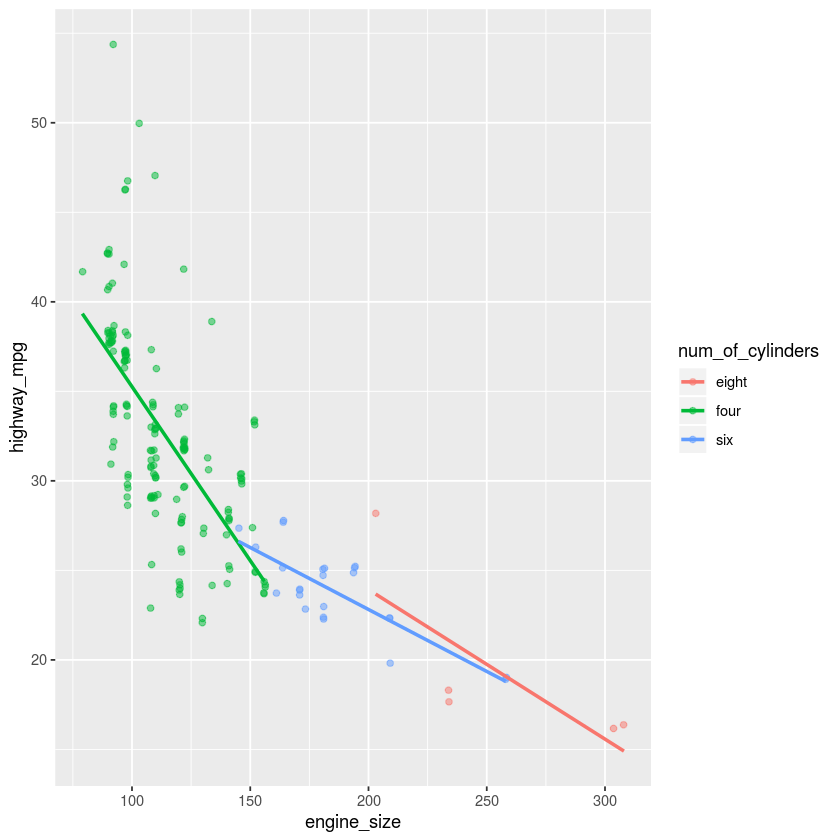

In [16]:
# Filter out the cylinders that I don't want
# I only want 4, 6, and 8
# Here is where there are strings rather than numbers
# I'll use %in% and c() to group all three together
# but an OR of each would work too.

# Since I am piping, I'll just add the filter() to the pipeline
df%>% 
   filter(num_of_cylinders %in% c("four", "six", "eight")) %>%
   ggplot(aes(x = engine_size, y = highway_mpg, color = num_of_cylinders)) + 
   geom_jitter(alpha = 0.5) + 
   geom_smooth(se = FALSE, method = "lm")

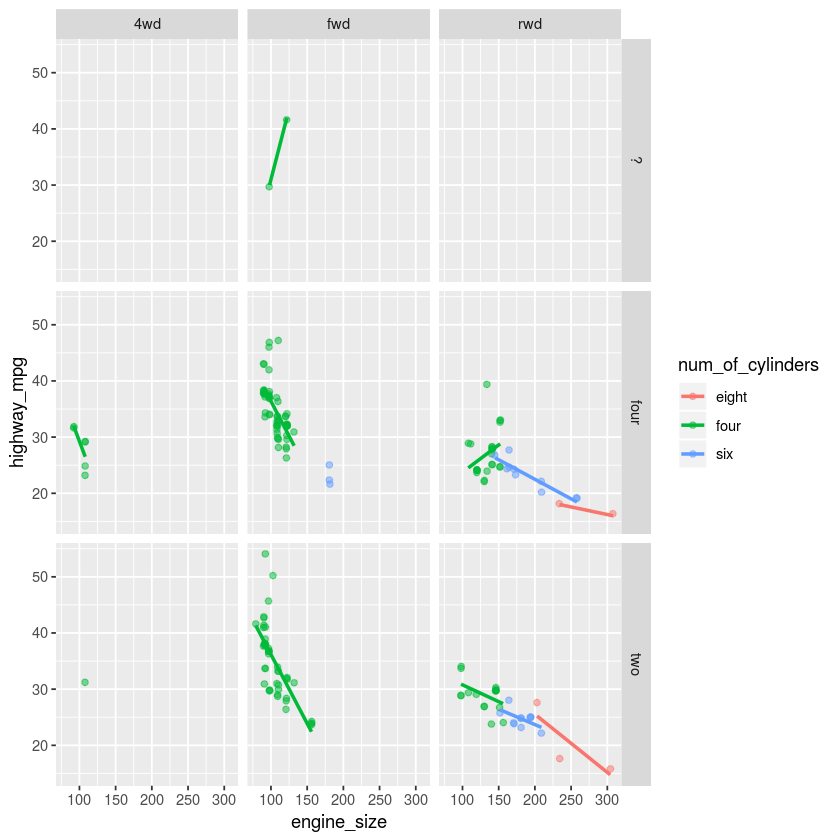

In [21]:
# Let me facet by number of doors and drive wheels
df %>% 
   filter(num_of_cylinders %in% c("four", "six", "eight")) %>%
   ggplot(aes(x = engine_size, y = highway_mpg, color = num_of_cylinders)) + 
   geom_jitter(alpha = 0.5) + 
   geom_smooth(se = FALSE, method = "lm") + 
   facet_grid(num_of_doors ~ drive_wheels)

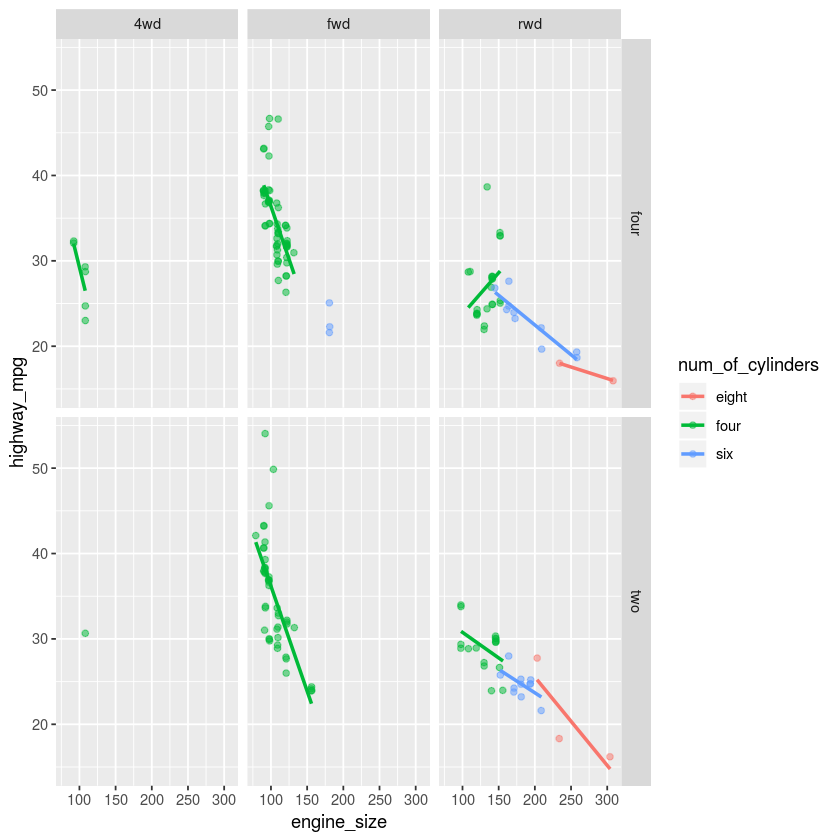

In [22]:
# Let's filter out the ? for doors
# using filter() and the != operator
df %>% 
   filter(num_of_cylinders %in% c("four", "six", "eight"), 
         num_of_doors != "?") %>%
  ggplot(aes(x = engine_size, y = highway_mpg, color = num_of_cylinders)) + 
   geom_jitter(alpha = 0.5) + 
   geom_smooth(se = FALSE, method = "lm") + 
   facet_grid(num_of_doors ~ drive_wheels)

Nicely done! Check out the trend lines. Any stand out as being different than the others? 